In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# --- CONFIGURAÇÕES DE IDENTIDADE VISUAL (PALETA GRAN) ---
COR_AZUL_PRINCIPAL = "#0D134C"
COR_VERMELHO = "#DD303E"
COR_PRETO = "#000000"
COR_BRANCO = "#FFFFFF"
FUNDO_EIXOS = "#F9F9F9"

# Tipografia redimensionada para otimização em PDF (Conforme aprovado)
FONT_LABEL = 20
FONT_TICK = 18
FONT_SUBFIGURE = 24

# Definição do tema
sns.set_theme(style="whitegrid", rc={"axes.facecolor": FUNDO_EIXOS})

# Força o uso da fonte DejaVu Sans, que tem todos os glifos matemáticos
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

### Transformação Trigonométrica (Variáveis Temporais e Cíclicas)

Este script gera a **Figura [FIG_T_SIN_COS]** para a Aula 4. 
A visualização evidencia como tratar variáveis que possuem ciclos finitos e que recomeçam, como as horas de um dia (0 a 23). 

* **(a) Tempo Linear:** Mostra a distância matemática enganosa calculada pelos algoritmos na forma tradicional, onde 0 (meia-noite) e 23 (onze da noite) parecem opostos absolutos.
* **(b) Transformação Circular:** Utiliza o Seno e o Cosseno para converter o eixo 1D linear num plano 2D. O resultado prático é a união dos extremos (0 e 23), indicando para o modelo de Machine Learning que ambos pertencem à mesma madrugada.

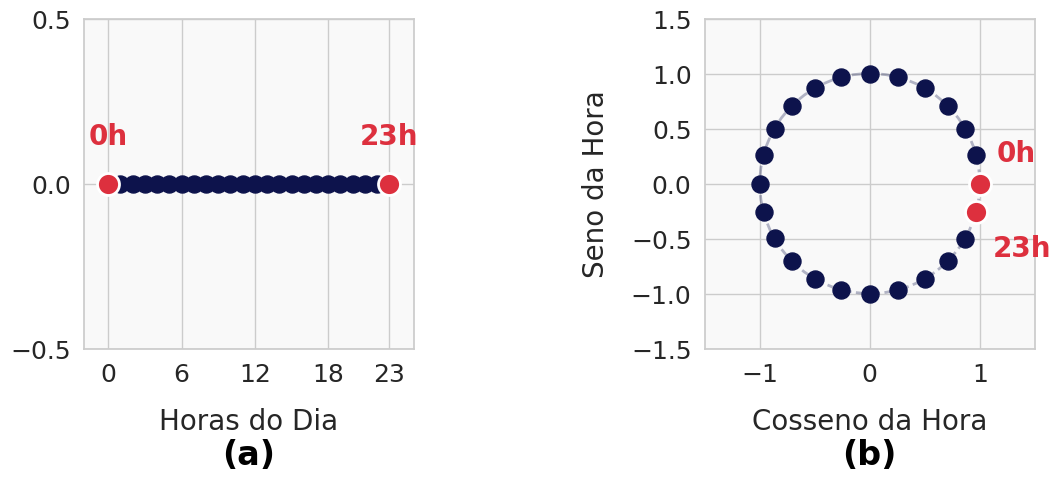

In [6]:
# 1. Geração dos dados: Horas do dia de 0 a 23
horas = np.arange(0, 24)

# 2. Transformação Trigonométrica (Mapeamento de 24h para um círculo de 2 * Pi radianos)
hora_sin = np.sin(2 * np.pi * horas / 24)
hora_cos = np.cos(2 * np.pi * horas / 24)

# 3. Configuração da Figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), facecolor=COR_BRANCO)

# ==========================================================
# (a) SUBPLOT ESQUERDO: Tempo Linear (O Problema)
# ==========================================================
ax1.scatter(horas, np.zeros_like(horas), color=COR_AZUL_PRINCIPAL, s=150, zorder=3)
ax1.scatter([0, 23], [0, 0], color=COR_VERMELHO, s=250, edgecolor=COR_BRANCO, linewidth=2, zorder=4)

# Ajuste fino na posição vertical das labels (Acima dos pontos)
ax1.text(0, 0.10, '0h', color=COR_VERMELHO, fontsize=FONT_LABEL, fontweight='bold', ha='center', va='bottom')
ax1.text(23, 0.10, '23h', color=COR_VERMELHO, fontsize=FONT_LABEL, fontweight='bold', ha='center', va='bottom')

# Formatação Eixo A
ax1.set_xlim(-2, 25)
ax1.set_ylim(-0.5, 0.5) 
ax1.set_xticks([0, 6, 12, 18, 23])
ax1.set_xticklabels(['0', '6', '12', '18', '23'])
ax1.set_yticks([-0.5, 0, 0.5]) 
ax1.set_xlabel("Horas do Dia", fontsize=FONT_LABEL, labelpad=15)

# Força o frame da esquerda a ser quadrado
ax1.set_box_aspect(1) 

# ==========================================================
# (b) SUBPLOT DIREITO: Tempo Circular (A Solução Trigonométrica)
# ==========================================================
ax2.scatter(hora_cos, hora_sin, color=COR_AZUL_PRINCIPAL, s=150, zorder=3)

cos_0, sin_0 = hora_cos[0], hora_sin[0]
cos_23, sin_23 = hora_cos[23], hora_sin[23]

ax2.scatter([cos_0, cos_23], [sin_0, sin_23], color=COR_VERMELHO, s=250, edgecolor=COR_BRANCO, linewidth=2, zorder=4)

# Posicionamento manual dos rótulos de 0h e 23h
ax2.text(cos_0 + 0.15, sin_0 + 0.15, '0h', color=COR_VERMELHO, fontsize=FONT_LABEL, fontweight='bold', ha='left', va='bottom')
ax2.text(cos_23 + 0.15, sin_23 - 0.2, '23h', color=COR_VERMELHO, fontsize=FONT_LABEL, fontweight='bold', ha='left', va='top')

circulo_fundo = plt.Circle((0, 0), 1, color=COR_AZUL_PRINCIPAL, fill=False, linestyle='--', alpha=0.3, lw=2)
ax2.add_patch(circulo_fundo)

# Formatação Eixo B
ax2.set_xlim(-1.5, 1.5)
ax2.set_ylim(-1.5, 1.5)
ax2.set_aspect('equal') # O círculo já garante o box_aspect(1) naturalmente
ax2.set_xlabel("Cosseno da Hora", fontsize=FONT_LABEL, labelpad=15)
ax2.set_ylabel("Seno da Hora", fontsize=FONT_LABEL, labelpad=15)

# ==========================================================
# FINALIZAÇÃO: Layout, Subfiguras e Salvamento
# ==========================================================
for ax in [ax1, ax2]:
    ax.tick_params(axis='both', labelsize=FONT_TICK)

# Posição das letras indicativas bem abaixo
ax1.text(0.5, -0.35, '(a)', transform=ax1.transAxes, fontsize=FONT_SUBFIGURE, fontweight='bold', color=COR_PRETO, ha='center')
ax2.text(0.5, -0.35, '(b)', transform=ax2.transAxes, fontsize=FONT_SUBFIGURE, fontweight='bold', color=COR_PRETO, ha='center')

# Adicionamos w_pad para dar um respiro lateral entre os plots e suas labels
plt.tight_layout(w_pad=2.0)

# Respiro interno extra
fig.subplots_adjust(top=0.90, bottom=0.35)

# Salvamento na estrutura de arquivos do projeto
caminho_save = os.path.join('..', 'outputs', 'figures', 'aula_04')
os.makedirs(caminho_save, exist_ok=True)

# O pad_inches=0.4 adiciona a margem branca extra e uniforme ao redor da imagem cortada!
plt.savefig(os.path.join(caminho_save, '04_transformacao_trigonometrica.png'), 
            dpi=300, bbox_inches='tight', pad_inches=0.4)

plt.show()